# Keras com Python

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

/home/55018335734/.conda/envs/datascience/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_csv('evasao.csv')
df.head()

,periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho,abandonou
0,2,0.25,8,1,4,0,0.000000,1
1,2,0.15,3,1,3,6,5.333333,0
2,4,0.10,0,1,1,0,8.000000,0
3,4,0.20,8,1,1,0,4.000000,1
4,1,0.20,3,1,1,1,8.000000,0


In [3]:
df.describe()

,periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho,abandonou
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.460000,0.123333,2.776667,0.476667,2.293333,2.213333,2.623111,0.410000
std,2.937772,0.086490,2.530111,0.500290,1.648133,2.734853,2.583423,0.492655
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.050000,0.000000,0.000000,1.000000,0.000000,0.400000,0.000000
50%,5.000000,0.100000,2.000000,0.000000,2.000000,1.000000,2.000000,0.000000
75%,8.000000,0.200000,5.000000,1.000000,4.000000,4.000000,4.000000,1.000000
max,10.000000,0.250000,8.000000,1.000000,5.000000,10.000000,10.000000,1.000000


Separação dos dados em features (características ou preditores) e labels (variável dependente):

In [4]:
features = df[['periodo','bolsa','repetiu','ematraso','disciplinas','faltas']]
labels = df[['abandonou']]

Separação em dados de treino e teste: 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [8]:
model = Sequential()

In [9]:
model.add(Dense(128, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
df_train_x = X_train.values
df_train_y = y_train.values
historico = model.fit(df_train_x, df_train_y)

Epoch 1/10
201/201 [==============================] - 0s 369us/step - loss: 0.5524 - acc: 0.7065
Epoch 2/10
201/201 [==============================] - 0s 241us/step - loss: 0.5460 - acc: 0.6816
Epoch 3/10
201/201 [==============================] - 0s 228us/step - loss: 0.5280 - acc: 0.7015
Epoch 4/10
201/201 [==============================] - 0s 195us/step - loss: 0.5278 - acc: 0.6766
Epoch 5/10
201/201 [==============================] - 0s 207us/step - loss: 0.5146 - acc: 0.7065
Epoch 6/10
201/201 [==============================] - 0s 229us/step - loss: 0.5156 - acc: 0.7065
Epoch 7/10
201/201 [==============================] - 0s 202us/step - loss: 0.5153 - acc: 0.7015
Epoch 8/10
201/201 [==============================] - 0s 219us/step - loss: 0.4922 - acc: 0.7065
Epoch 9/10
201/201 [==============================] - 0s 221us/step - loss: 0.5050 - acc: 0.7214
Epoch 10/10
201/201 [==============================] - 0s 235us/step - loss: 0.4835 - acc: 0.7612


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_10 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 330,113
Trainable params: 330,113
Non-trainable params: 0
_________________________________________________________________


Plotando a acurácia e a perda (referência: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/) 

dict_keys(['loss', 'acc'])


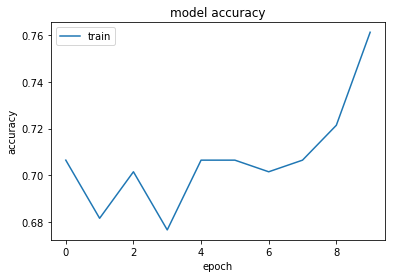

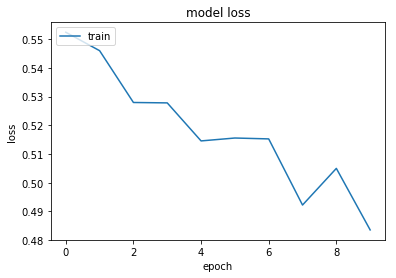

In [26]:
print(historico.history.keys())
# summarize history for accuracy
plt.plot(historico.history['acc'])
#plt.plot(historico.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historico.history['loss'])
#plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
df_test_x = X_test.values
df_test_y = y_test.values
print(model.metrics_names)
model.evaluate(df_test_x,df_test_y)

['loss', 'acc']
99/99 [==============================] - 0s 127us/step


[0.6022236907120907, 0.64646464706671358]

Temos uma acurácia de 65%